In [1]:
import osmnx as ox
import networkx as nx
from IPython.display import IFrame, HTML
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import sys, random
from problem import *
from utils import *

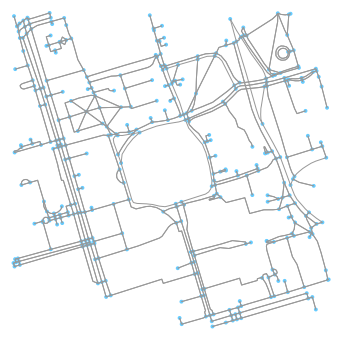

In [2]:
location_point = (43.661667, -79.395)
G = ox.graph_from_point(location_point, dist=300, clean_periphery=True, simplify=True)
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)
fig, ax = ox.plot_graph(G)

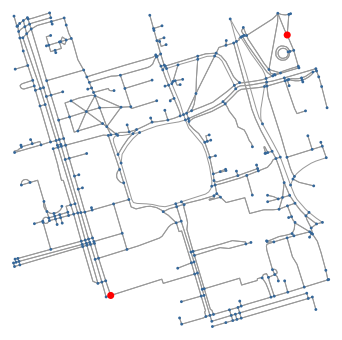

In [4]:
# marking both the source and destination node

nc = ['r' if node == 389677909 or node == 55808290 else '#336699' for node in G.nodes()]
ns = [50 if node == 389677909 or node == 55808290 else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

In [5]:
%%capture
source(Node)

In [6]:
def randomized_BFS(G, source, destination, nums_of_paths = 1):
    origin = Node(graph = G, node = G[source], osmid = source, distance = 0, parent = None)
    destination = Node(graph = G, node = G[destination], osmid = destination)
    nums = nums_of_paths
    routes = list()
    while nums > 0:
        route = []
        frontier = deque([origin])
        explored = set()
        found = False
        while frontier and not found:
            node = random.choice(frontier)   # here is the randomization part
            frontier.remove(node)
            explored.add(node)
            for child in node.expand():
                if child not in explored and child not in frontier:
                    if child == destination:
                        route, cost = child.path()
                        routes.append((route, cost))
                        found = True
                    frontier.append(child)
        nums -= 1
    return routes

In [7]:
origin = Node(graph = G, node = G[55808290], osmid = 55808290, distance = 0, parent = None)
destination = Node(graph = G, node = G[389677909], osmid = 389677909)

In [58]:
stuff = randomized_BFS(G, 55808290, 389677909, nums_of_paths=50)

In [9]:
G[55808301]

AdjacencyView({55808308: {0: {'osmid': 7685276, 'highway': 'footway', 'oneway': False, 'length': 16.377}}, 55808169: {0: {'osmid': 7685276, 'highway': 'footway', 'oneway': False, 'length': 77.052, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fd96e401da0>}}, 6542457312: {0: {'osmid': 7685328, 'highway': 'footway', 'oneway': False, 'length': 6.596, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fd96e401dd8>}}, 55808177: {0: {'osmid': 7685328, 'highway': 'footway', 'oneway': False, 'length': 72.707, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fd96e401e10>}}})

In [20]:
list(G[55808301])

[55808308, 55808169, 6542457312, 55808177]

In [27]:
list(G[55808233])

[4953810914, 299625330, 389678267]

In [18]:
G[6542457312]

AdjacencyView({4953810914: {0: {'osmid': 7685328, 'highway': 'footway', 'oneway': False, 'length': 3.633}}, 55808308: {0: {'osmid': 7685278, 'highway': 'footway', 'oneway': False, 'length': 17.152, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fd96e39d438>}}, 55808301: {0: {'osmid': 7685328, 'highway': 'footway', 'oneway': False, 'length': 6.596, 'geometry': <shapely.geometry.linestring.LineString object at 0x7fd96e39d470>}}})

In [33]:
list(G[299625330])
import random

In [89]:
def mutate_path(a, i = 5):
    length = len(a)
    breaking_points = [random.randint(1, length - 2) for _ in range(i)]
    for point in breaking_points:
        i = point - 1
        j = point + 1
        firstNode = a[i]
        secondNode = a[point]
        thirdNode = a[j]
        # what we are going to do is to try to go
        # from first node to the third node with either deleting 
        # the second node or choose some other intermediate node
        # between the first and the second
        first_neighbors = list(G[firstNode])
        if thirdNode in first_neighbors:
            a.remove(secondNode)
            breaking_points = [*map(lambda x : x - 1, breaking_points)]
        else:
            for node in first_neighbors:
                if node != secondNode:
                    neighbors = list(G[node])
                    if thirdNode in neighbors:
                        a[point] = node
                        return a
    return a
        

In [90]:
mutate_path(stuff[6][0], i = 10)

[55808290,
 55808177,
 55808301,
 6542457312,
 4953810914,
 55808233,
 299625330,
 389677953,
 2143488335,
 389677947,
 1840221695,
 1840221686,
 1840221676,
 783622470,
 389678138,
 3707407638,
 6028561924,
 6028561921,
 389678131,
 2557539841,
 389678133,
 389677909]

In [139]:
first = mutate_path(stuff[7][0])

In [140]:
second = mutate_path(stuff[4][0])

In [141]:
def cross_over(p1, p2):
    intersection = [*filterfalse(lambda element : element in [55808290, 389677909] , list(set(first) & set(second)))]
    cross_over_point = random.choice(intersection)
    first_point = p1.index(cross_over_point)
    second_point = p2.index(cross_over_point)
    if probability(0.5):
        return p1[:first_point]+p2[second_point:]
    else:
        return p2[:second_point]+p1[first_point:]

In [159]:
route = cross_over(first, second)

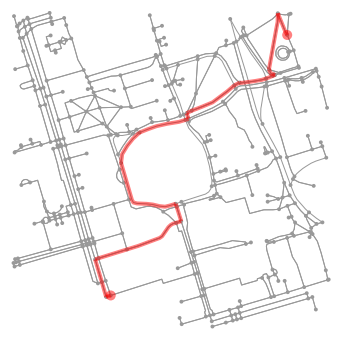

In [160]:
fig, ax = ox.plot_graph_route(G, route)